In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import glob
import pandas as pd
from sklearn.decomposition import FastICA, PCA

In [5]:
path = 'data/H/EC/*'
file_list_in = glob.glob(path)
list_im = [file for file in file_list_in]
list_im.sort()
print("file_list:{}".format(list_im))


file_list:['data/H/EC\\H S1 EC.edf.csv', 'data/H/EC\\H S10 EC.edf.csv', 'data/H/EC\\H S11 EC.edf.csv', 'data/H/EC\\H S12 EC.edf.csv', 'data/H/EC\\H S13 EC.edf.csv', 'data/H/EC\\H S14 EC.edf.csv', 'data/H/EC\\H S15 EC.edf.csv', 'data/H/EC\\H S16 EC.edf.csv', 'data/H/EC\\H S17 EC.edf.csv', 'data/H/EC\\H S18 EC.edf.csv', 'data/H/EC\\H S19 EC.edf.csv', 'data/H/EC\\H S2 EC.edf.csv', 'data/H/EC\\H S20 EC.edf.csv', 'data/H/EC\\H S21 EC.edf.csv', 'data/H/EC\\H S22 EC.edf.csv', 'data/H/EC\\H S23 EC.edf.csv', 'data/H/EC\\H S24 EC.edf.csv', 'data/H/EC\\H S25 EC.edf.csv', 'data/H/EC\\H S26 EC.edf.csv', 'data/H/EC\\H S27 EC.edf.csv', 'data/H/EC\\H S3 EC.edf.csv', 'data/H/EC\\H S4 EC.edf.csv', 'data/H/EC\\H S5 EC.edf.csv', 'data/H/EC\\H S6 EC.edf.csv', 'data/H/EC\\H S7 EC.edf.csv', 'data/H/EC\\H S8 EC.edf.csv', 'data/H/EC\\H S9 EC.edf.csv']


In [15]:
#https://raphaelvallat.com/bandpower.html
#calculate relative power
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import simps
import glob
import pandas as pd

result_list = []
total_list = []

# 뇌파의 상대 파워 구하기

def bandpower(data, sf, band, window_sec=None,relative=True):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp


#alpha + theta -> 4-12
#alpha ->8,13
#theta -> 4,8
######change path
path = './data/H/EC/*'
file_list_in = glob.glob(path)
list_im = [file for file in file_list_in]
list_im.sort()
print("file_list:{}".format(list_im))

for k in range(len(list_im)):
    print('loading dataset : ',k)
    data_first = pd.read_csv(list_im[k])
    result_list = []
    for n in range(len(data_first.columns)):
        data_cv = data_first.iloc[:, n]
        # print(data_first.columns[n],':',n)
        data = data_cv
        #choosing hz
        result = bandpower(data, 256, [4, 8], window_sec=None)
        print(data_first.columns[n], ':', result)
        result_list.append(result)
    total_list.append(result_list)

print(total_list)

data_frame = pd.DataFrame(total_list)

#save result as dataframe
#######change name

count = len(data_frame.columns)

if (count == 20):
    data_frame.to_csv('./result/H_EC_relative_power_raw_theta_1.csv', index=False, header=['Fp1-LE','F3-LE','C3-LE','P3-LE','O1-LE','F7-LE',
                                                                                                    'T3-LE','T5-LE','Fz-LE','Fp2-LE','F4-LE','C4-LE','P4-LE','O2-LE','F8-LE','T4-LE','T6-LE','Cz-LE','Pz-LE','A2-A1'])
elif (count == 22):
    data_frame.to_csv('./result/H_EC_relative_power_raw_theta_1.csv', index=False, header=['Fp1-LE','F3-LE','C3-LE','P3-LE','O1-LE','F7-LE',
                                                                                                    'T3-LE','T5-LE','Fz-LE','Fp2-LE','F4-LE','C4-LE','P4-LE','O2-LE','F8-LE','T4-LE','T6-LE','Cz-LE','Pz-LE','A2-A1','23A-23R','24A-24R'])
else:
    print("else error")





file_list:['./data/H/EC\\H S1 EC.edf.csv', './data/H/EC\\H S10 EC.edf.csv', './data/H/EC\\H S11 EC.edf.csv', './data/H/EC\\H S12 EC.edf.csv', './data/H/EC\\H S13 EC.edf.csv', './data/H/EC\\H S14 EC.edf.csv', './data/H/EC\\H S15 EC.edf.csv', './data/H/EC\\H S16 EC.edf.csv', './data/H/EC\\H S17 EC.edf.csv', './data/H/EC\\H S18 EC.edf.csv', './data/H/EC\\H S19 EC.edf.csv', './data/H/EC\\H S2 EC.edf.csv', './data/H/EC\\H S20 EC.edf.csv', './data/H/EC\\H S21 EC.edf.csv', './data/H/EC\\H S22 EC.edf.csv', './data/H/EC\\H S23 EC.edf.csv', './data/H/EC\\H S24 EC.edf.csv', './data/H/EC\\H S25 EC.edf.csv', './data/H/EC\\H S26 EC.edf.csv', './data/H/EC\\H S27 EC.edf.csv', './data/H/EC\\H S3 EC.edf.csv', './data/H/EC\\H S4 EC.edf.csv', './data/H/EC\\H S5 EC.edf.csv', './data/H/EC\\H S6 EC.edf.csv', './data/H/EC\\H S7 EC.edf.csv', './data/H/EC\\H S8 EC.edf.csv', './data/H/EC\\H S9 EC.edf.csv']
loading dataset :  0
EEG Fp1-LE : 0.143667461554815
EEG F3-LE : 0.20252477676891087
EEG C3-LE : 0.139958348

     Fp1-LE     F3-LE     C3-LE     P3-LE     O1-LE     F7-LE     T3-LE  \
0  0.184474  0.198155  0.161494  0.134357  0.151985  0.173947  0.165982   
1  0.225276  0.229468  0.159779  0.145754  0.112162  0.207308  0.142387   
2  0.119555  0.244717  0.309420  0.277705  0.254320  0.266296  0.078859   
3  0.176424  0.158124  0.128990  0.144755  0.151377  0.157712  0.116636   
4  0.236523  0.264370  0.192220  0.177678  0.140914  0.188916  0.221417   

      T5-LE     Fz-LE    Fp2-LE  ...     P4-LE     O2-LE     F8-LE     T4-LE  \
0  0.154749  0.210309  0.190316  ...  0.217264  0.217044  0.219447  0.206899   
1  0.150876  0.238506  0.221063  ...  0.125876  0.116339  0.171838  0.161264   
2  0.238816  0.386541  0.164592  ...  0.253650  0.297507  0.099128  0.198387   
3  0.139114  0.161881  0.170433  ...  0.167229  0.167210  0.151572  0.167513   
4  0.186193  0.282208  0.255919  ...  0.137733  0.137655  0.214485  0.181852   

      T6-LE     Cz-LE     Pz-LE     A2-A1  23A-23R  24A-24R  
0  0.2

C:\Users\GC\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\GC\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


row_list:  [[0.015079160128418635, -0.0101022461264703, 0.24641393686011934, 0.13033538248939047, 0.1450861953174979, 0.16991265244432582, 0.25142084029710393, 0.10105255170351242], [0.03616292102061544, 0.010995361366498813, 0.26612583457363564, 0.15101543596520217, 0.16567439131109518, 0.19032572227898736, 0.2710783621192367, 0.12188798367389599], [-0.01368946791177321, -0.03885364719068665, 0.21920486677505485, 0.10195489995800665, 0.11681096489354864, 0.1418431699099454, 0.22428003966159324, 0.07250058711607384]]
row_list:  [[0.0007236110895830643, 0.06456768299160347, 0.09723118944541263, 0.08131442987635254, 0.02564246481896673, 0.06332183771153804, 0.13368405617755144, 0.10405256414557768], [-0.03355042070819603, 0.030361671851303708, 0.06316849391740742, 0.04717269599987657, -0.008638326700229487, 0.02911181766902133, 0.09986843166450328, 0.07002910320412553], [0.011270889381649973, 0.07506392735384756, 0.10766813655589128, 0.09178307616708481, 0.03618004386280155, 0.0738198993

"\n#이미지 보여주기\n    fig.colorbar(im, shrink=0.5, aspect=5)\n    ax.set_xlabel('H_EC')\n    plt.show()\n"

<Figure size 4608x6912 with 0 Axes>

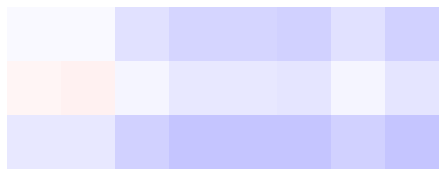

<Figure size 4608x6912 with 0 Axes>

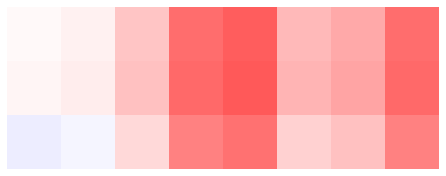

<Figure size 4608x6912 with 0 Axes>

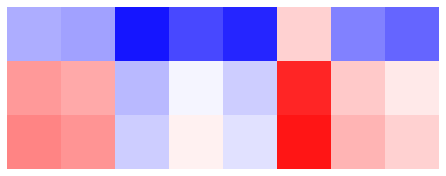

<Figure size 4608x6912 with 0 Axes>

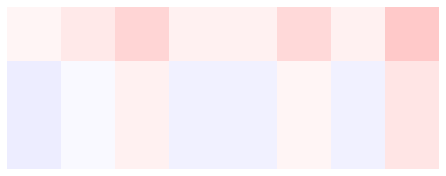

<Figure size 4608x6912 with 0 Axes>

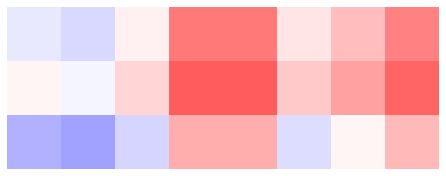

<Figure size 4608x6912 with 0 Axes>

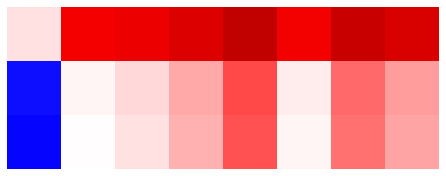

<Figure size 4608x6912 with 0 Axes>

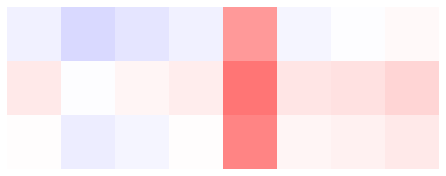

<Figure size 4608x6912 with 0 Axes>

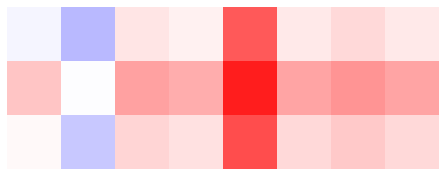

<Figure size 4608x6912 with 0 Axes>

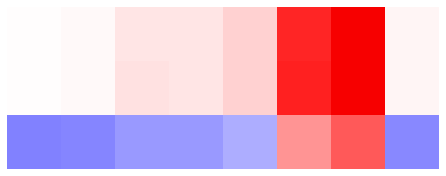

<Figure size 4608x6912 with 0 Axes>

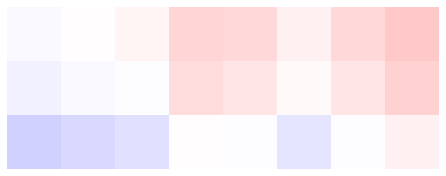

<Figure size 4608x6912 with 0 Axes>

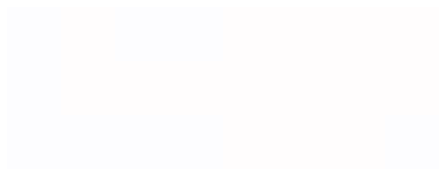

<Figure size 4608x6912 with 0 Axes>

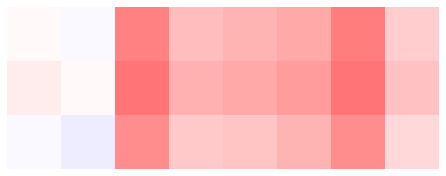

<Figure size 4608x6912 with 0 Axes>

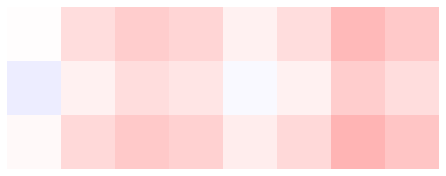

<Figure size 4608x6912 with 0 Axes>

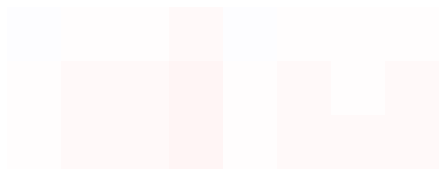

<Figure size 4608x6912 with 0 Axes>

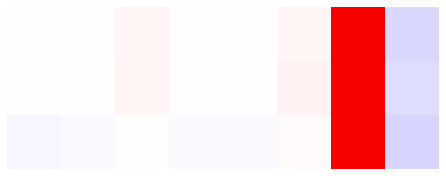

<Figure size 4608x6912 with 0 Axes>

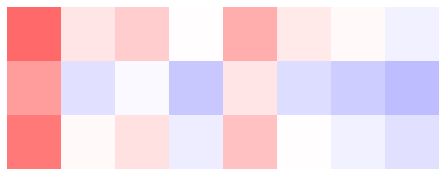

<Figure size 4608x6912 with 0 Axes>

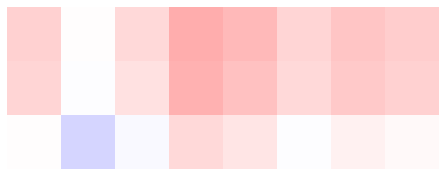

<Figure size 4608x6912 with 0 Axes>

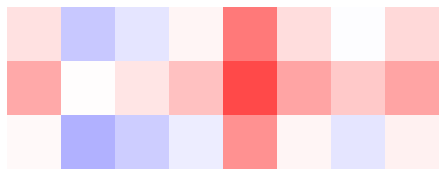

<Figure size 4608x6912 with 0 Axes>

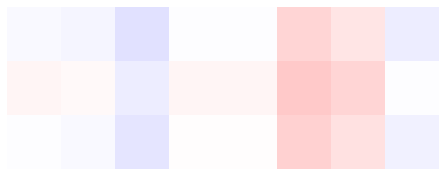

<Figure size 4608x6912 with 0 Axes>

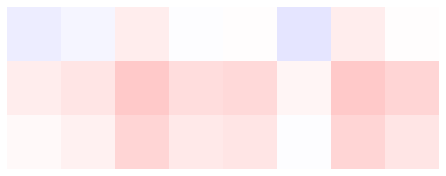

<Figure size 4608x6912 with 0 Axes>

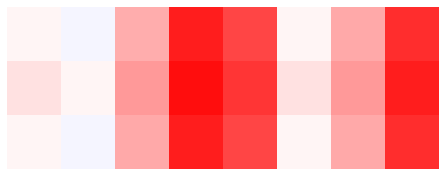

<Figure size 4608x6912 with 0 Axes>

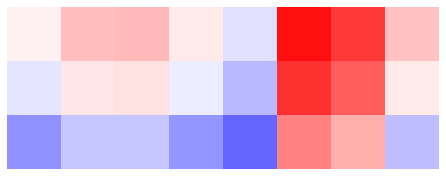

<Figure size 4608x6912 with 0 Axes>

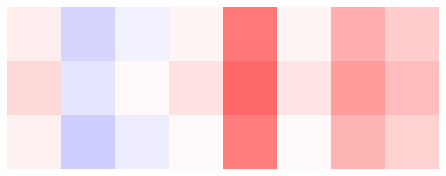

<Figure size 4608x6912 with 0 Axes>

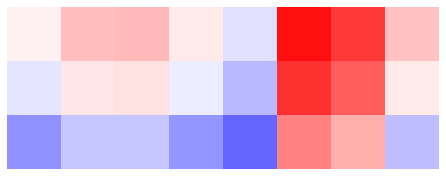

<Figure size 4608x6912 with 0 Axes>

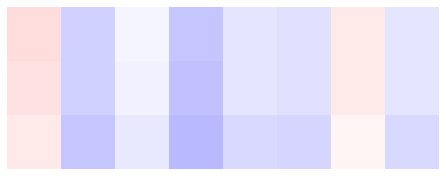

<Figure size 4608x6912 with 0 Axes>

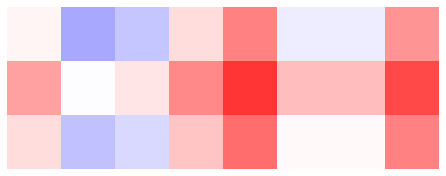

<Figure size 4608x6912 with 0 Axes>

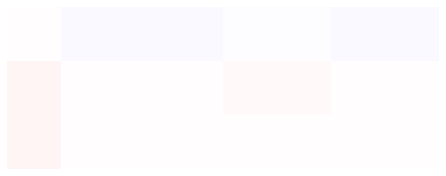

<Figure size 4608x6912 with 0 Axes>

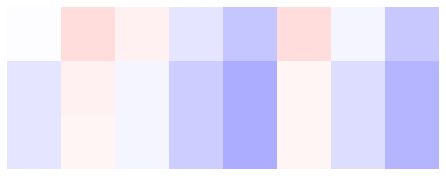

<Figure size 4608x6912 with 0 Axes>

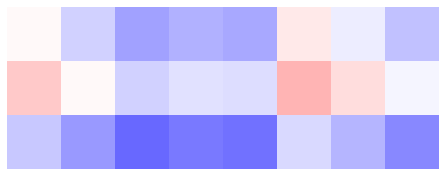

<Figure size 4608x6912 with 0 Axes>

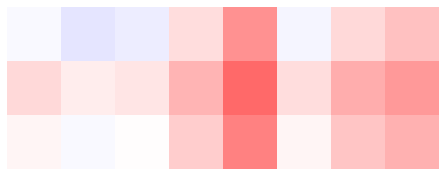

In [17]:
import numpy as np
import matplotlib
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv("./result/MDD_EC_relative_power_raw_theta_1.csv")

print(data.head())

column_list = []
row_list = []


#7
#30

print(len(data))

for l in range(len(data)):
    row_list = []
    result = 0
    # k is left Hemispheric
    # n is right Hemispheric
    for k in range(0, 6):
        column_list = []
        result = 0
        if k < 2 or k == 5:
            for n in range(9, 17):
                result = 0
                a = data.iloc[l, k]
                b = data.iloc[l, n]
                result += ((a - b) / (a + b))
                column_list.append(result)
            row_list.append(column_list)
        else:
            pass
    image = np.array(row_list)
    print('row_list: ', row_list)

    plt.figure(figsize=(64, 96))
    fig, axis = plt.subplots()
    height, width = image.shape
    im = axis.imshow(image, cmap='seismic', vmin=-1, vmax=1)

    # Without margin
    plt.axis('off'), plt.xticks([]), plt.yticks([])
    axis.axes.get_xaxis().set_visible(False)
    axis.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0, wspace=0)
    # fig.colorbar(im, shrink=0.5, aspect=5)
    # plt.show()
    plt.savefig('./plot/save/MDD/MDD_EC_' + str(l) + '_theta.png', bbox_inches='tight', pad_inches=0)


    # df_cm = pd.DataFrame(image)
    # plt.figure(figsize=(8, 3))
    # sn.heatmap(df_cm, annot=True, vmin=-10, vmax=10)
    # plt.show()



'''
#이미지 보여주기
    fig.colorbar(im, shrink=0.5, aspect=5)
    ax.set_xlabel('H_EC')
    plt.show()
'''

     Fp1-LE     F3-LE     C3-LE     P3-LE     O1-LE     F7-LE     T3-LE  \
0  0.184474  0.198155  0.161494  0.134357  0.151985  0.173947  0.165982   
1  0.225276  0.229468  0.159779  0.145754  0.112162  0.207308  0.142387   
2  0.119555  0.244717  0.309420  0.277705  0.254320  0.266296  0.078859   
3  0.176424  0.158124  0.128990  0.144755  0.151377  0.157712  0.116636   
4  0.236523  0.264370  0.192220  0.177678  0.140914  0.188916  0.221417   

      T5-LE     Fz-LE    Fp2-LE  ...     P4-LE     O2-LE     F8-LE     T4-LE  \
0  0.154749  0.210309  0.190316  ...  0.217264  0.217044  0.219447  0.206899   
1  0.150876  0.238506  0.221063  ...  0.125876  0.116339  0.171838  0.161264   
2  0.238816  0.386541  0.164592  ...  0.253650  0.297507  0.099128  0.198387   
3  0.139114  0.161881  0.170433  ...  0.167229  0.167210  0.151572  0.167513   
4  0.186193  0.282208  0.255919  ...  0.137733  0.137655  0.214485  0.181852   

      T6-LE     Cz-LE     Pz-LE     A2-A1  23A-23R  24A-24R  
0  0.2

C:\Users\GC\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 [[0.0, 0.0372942958852864, 0.009543593185930926, 0.01822632671848732, -0.035459623261569144, -0.08538166804769837, 0.3451683773041666, 0.15660324652912444, 0.00942109378491891, -0.026463476138546042, 0.049247454363829234, 0.020210293230514247, 0.15875493026119558, 0.0970237214114216, 0.19226170338266063, 0.2641939422632069], [-0.0372942958852864, 0.0, -0.0277605832902463, -0.019080939206664566, -0.07265783339945174, -0.1222865730117591, 0.31188896935951294, 0.12000985715113899, -0.02788299887732209, -0.06369490917976968, 0.011975152632262084, -0.017096889069986965, 0.12218404374288452, 0.059946337233549994, 0.15608658968547717, 0.22915751869345163], [-0.009543593185930926, 0.0277605832902463, 0.0, 0.00868424411033675, -0.044987991961315026, -0.09484797456022905, 0.3367340353871338, 0.14727977145621213, -0.00012251041605662586, -0.03599797779577823, 0.039722530674757624, 0.010668757821968324, 0.14943774908373583, 0.08756120595551858, 0.18305399001050862, 0.2552940371248989], [-0.018226

"\n#이미지 보여주기\n    fig.colorbar(im, shrink=0.5, aspect=5)\n    ax.set_xlabel('H_EC')\n    plt.show()\n"

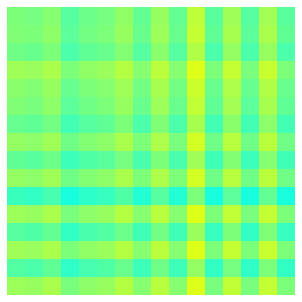

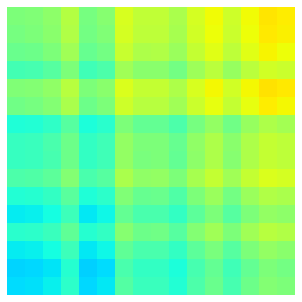

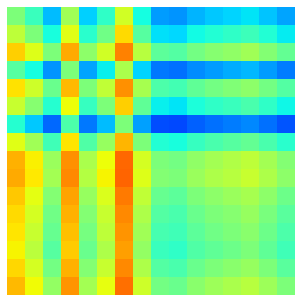

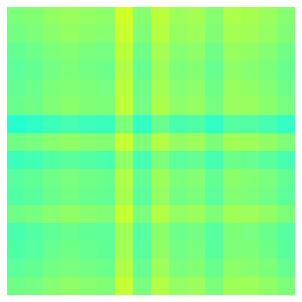

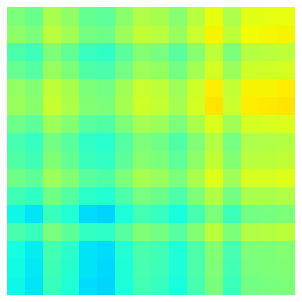

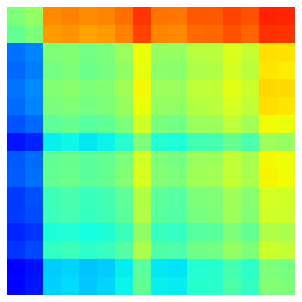

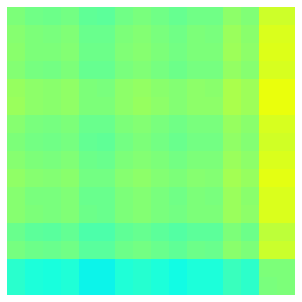

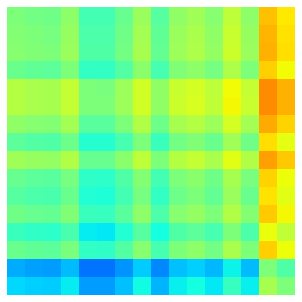

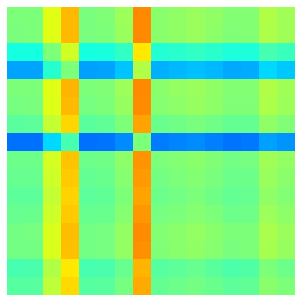

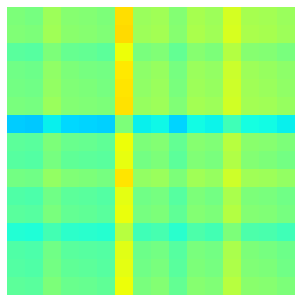

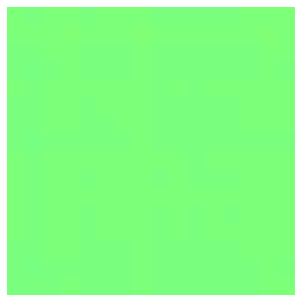

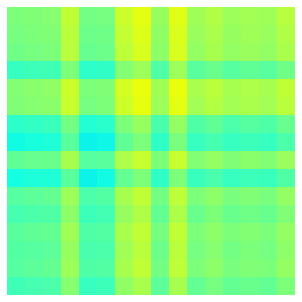

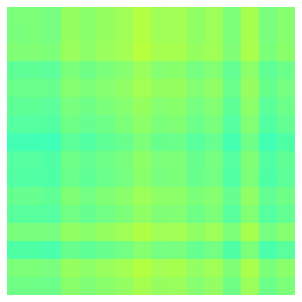

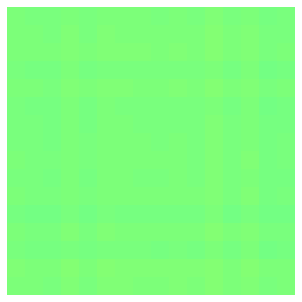

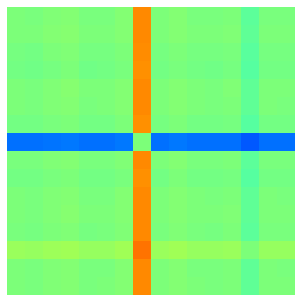

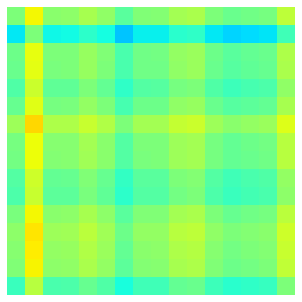

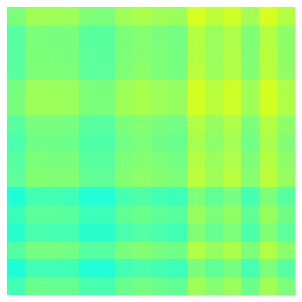

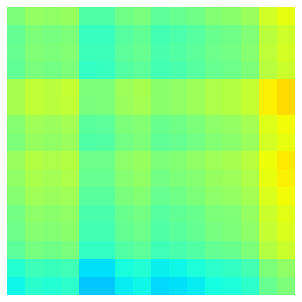

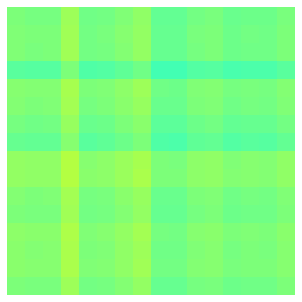

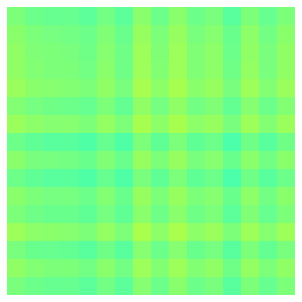

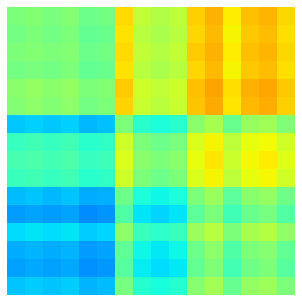

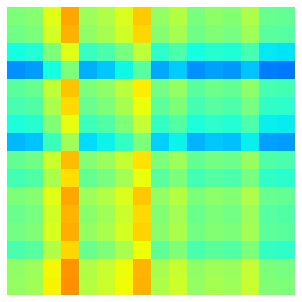

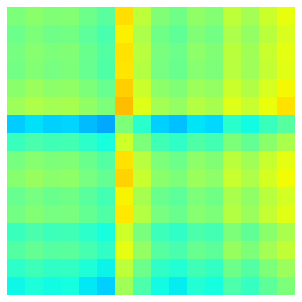

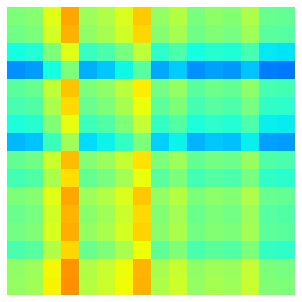

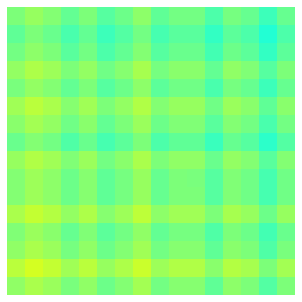

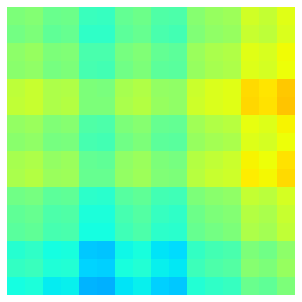

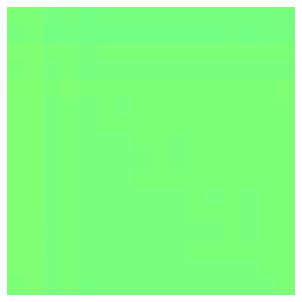

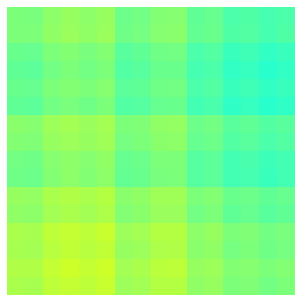

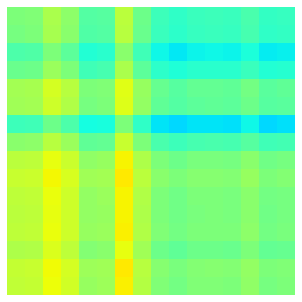

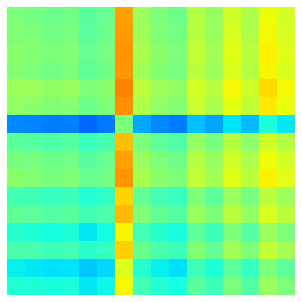

In [18]:
import numpy as np
import matplotlib
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn

data = pd.read_csv("./result/MDD_EC_relative_power_raw_theta_1.csv")

print(data.head())

column_list = []
row_list = []


column_change = ['Fp1-LE','Fp2-LE','F7-LE','F8-LE','F3-LE','F4-LE','T3-LE','T4-LE','C3-LE','C4-LE','P3-LE','P4-LE','T5-LE','T6-LE','O1-LE','O2-LE','Fz-LE','Cz-LE','Pz-LE','A2-A1']
data = data[column_change]



#7
#30

print(len(data))

for l in range(len(data)):
    row_list = []
    result = 0
    # k is left Hemispheric
    # n is right Hemispheric
    for k in range(0, 16):
        column_list = []
        result = 0
        for n in range(0,16):
            result = 0
            a = data.iloc[l, k]
            b = data.iloc[l, n]
            result += (a - b) / (a + b)
            column_list.append(result)
        row_list.append(column_list)
    image = np.array(row_list)
    print('row_list: ', row_list)

    # plt.figure(figsize=(64, 96))
    fig, axis = plt.subplots()
    height, width = image.shape
    im = axis.imshow(image, cmap='jet', vmin=-1, vmax=1)

    # Without margin
    plt.axis('off'), plt.xticks([]), plt.yticks([])
    axis.axes.get_xaxis().set_visible(False)
    axis.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0, wspace=0)
    #fig.colorbar(im, shrink=0.5, aspect=5)
    #plt.show()
    plt.savefig('./plot' + str(l) + '_pca_alpha.png', bbox_inches='tight', pad_inches=0)


    # df_cm = pd.DataFrame(image)
    # plt.figure(figsize=(8, 3))
    # sn.heatmap(df_cm, annot=True, vmin=-10, vmax=10)
    # plt.show()




'''
#이미지 보여주기
    fig.colorbar(im, shrink=0.5, aspect=5)
    ax.set_xlabel('H_EC')
    plt.show()
'''